Введите 6 элементов Кеплера:
1) Большая полуось (км): 7000
2) Эксцентриситет: 0
3) Наклон (в градусах): 0
4) Долгота восходящего угла (в градусах): 0
5) Аргумент перицентра (в градусах): 0
6) Истинная аномалия (в градусах): 

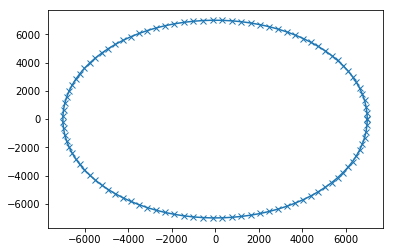

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# создание многочленов для нахождения точки
def point(z):
    x = z[0]
    y = z[1]
    m = np.zeros(2)
    m[0] =  (math.cos(M)*((x**2+y**2)**(1/2)))-x
    m[1] = (y**2)/(b**2) - 1 + ((x+f)**2)/(a**2)
    return m

# создает марицу поворота относительно вектора
def getPovMatrix(vec, fi): 
    x = vec[0]
    y = vec[1]
    z = vec[2]
    m = np.zeros((3,3))
    m[0][0] = math.cos(fi) + ((1-math.cos(fi))*(x**2))
    m[0][1] = ((1-math.cos(fi))*x*y)-((math.sin(fi))*z)
    m[0][2] = ((1-math.cos(fi))*x*z) + ((math.sin(fi))*y)
    m[1][0] = ((1-math.cos(fi))*y*x) + ((math.sin(fi))*z)
    m[1][1] = (math.cos(fi)) + ((1-math.cos(fi))*(y**2))
    m[1][2] = ((1 - math.cos(fi))*y*z) - ((math.sin(fi))*x)
    m[2][0] = ((1 - math.cos(fi))*z*x) - ((math.sin(fi))*y)
    m[2][1] = ((1-math.cos(fi))*z*y) + ((math.sin(fi))*x)
    m[2][2] = (math.cos(fi)) + ((1-math.cos(fi))*(z**2))
    return m

#создает вектор из координат
def createVec(x,y,z):
    v = np.zeros((3,1))
    v[0][0] = x
    v[1][0] = y
    v[2][0] = z
    return v


# body
# ввод данных
print ("Введите 6 элементов Кеплера:")
while True:
    print ("1) Большая полуось (км): ", end = "")
    a = float(input())
    if a>0:
        break
while True:
    print ("2) Эксцентриситет: ", end = "")
    e = float(input())
    if e>=0 and e<1:
        break
print ("3) Наклон (в градусах): ", end = "")
i = (float(input())%360)/180*math.pi
print ("4) Долгота восходящего угла (в градусах): ", end = "")
d = ((float(input())%360)/180*math.pi)
print ("5) Аргумент перицентра (в градусах): ", end = "")
w = (float(input())%360)/180*math.pi
print ("6) Истинная аномалия (в градусах): ", end = "")
# M = (float(input())%360)/180*math.pi
Mlist = np.linspace( 0, 2*math.pi, 100)


# вычисление позиции в двумерном пространстве
f = float(a*e) # расстояние от центра эллипса до точки фокуса
b = math.sqrt(a*a - f*f) # величина малой полуоси
xlist = []
ylist = []
for M in Mlist:
    x,y = fsolve(point, [2.0,3.0])
    if M > math.pi:
        y = (-1)* y
    z = 0 
    vec = createVec(x,y,z)

    #создание вектора нормали к плоскости
    x = 0
    y = 0
    z = 1
    normalVec = createVec(x,y,z)

    #создание вектора на восходящий узел
    x = math.cos(d)
    y = math.sin(d)
    z = 0
    vUzel = createVec(x,y,z)

    # наклон плокости на (i)
    m = getPovMatrix(vUzel, i)
    vec = m.dot(vec)
    normalVec = m.dot(normalVec)

    # поворот на аргумент перицентра
    m = getPovMatrix(normalVec, w)
    vec = m.dot(vec)
    xlist.append(vec[0])
    ylist.append(vec[1])
plt.plot(xlist,ylist,marker = "x")

#вывод
#print ("Спутник находится в точке: ({},{},{})".format(vec[0],vec[1],vec[2]))